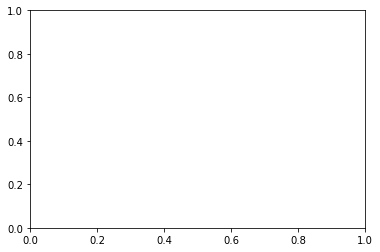

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.font_manager import FontProperties
import matplotlib.gridspec as gridspec
ax = plt.gca()

In [2]:
# set column names for final dataframes
columns = ['time', 'south', 'north', 'escaped', 'remaining', 'photodestroyed']

In [3]:
# set path to directory where data files are located
# on my laptop, there are different folders for H2O vs HDO
# if everything is in one folder, it will be harder to write code to distinguish between files. not recommended.
os.chdir('/Users/circuiteer/Downloads/HDO_Activation_Post-Processed')
path = os.getcwd()

# creating empty, individual dataframes to be filled in the for loop
cold = pd.DataFrame()
mol_out = pd.DataFrame()
photo = pd.DataFrame()

# loops through folder and separates files by cold.dat, mol_out.dat, and photo.dat
for file in os.listdir(path):
    if file.endswith("cold.dat"):
        data = pd.read_csv(file, sep="\s+", names = [columns[0], columns[1], columns[2]])
        cold = pd.concat([cold, data], axis=0)
    if file.endswith("mol_out.dat"):
        data = pd.read_csv(file, sep="\s+", names = [columns[0], columns[3]])
        mol_out = pd.concat([mol_out, data], axis=0)
    if file.endswith("photo.dat"):
        data = pd.read_csv(file, sep="\s+", names = [columns[0], columns[4], columns[5]])
        photo = pd.concat([photo, data], axis=0)
        
# we previously made individual dataframes for cold, mol_out, and photo
# now we move them all into one dataframe for H2O
h2o_data = pd.merge(left = cold, right = mol_out)
h2o_data = pd.merge(left = h2o_data, right = photo)

# adjusting time column and sorting
h2o_data['time'] = h2o_data['time']/3600
h2o_data = h2o_data.sort_values(by = ['time']).fillna(0)

# making a separate dataframe for percentages
# seems better than one giant dataframe
h2o_data = h2o_data.set_index('time')
h2o_data = h2o_data.head(2000)
h2o_percent = h2o_data.div(h2o_data.sum(axis=1), axis=0).mul(100).reset_index().fillna(0)
h2o_data = h2o_data.reset_index()
print(h2o_data)

             time     south     north   escaped  remaining  photodestroyed
0        0.708000  0.077374  0.065110  0.000000  104.22700        1.305875
1        1.416000  0.104299  0.087665  0.000000  103.07620        2.407195
2        2.124000  0.126083  0.104868  0.000011  102.10630        3.338093
3        2.832000  0.144057  0.120098  0.000063  101.28570        4.125514
4        3.540000  0.159403  0.133207  0.000211  100.57460        4.807930
...           ...       ...       ...       ...        ...             ...
1995  1413.168056  3.933097  3.442845  0.010396   24.93158       73.358350
1996  1413.876111  3.934237  3.443648  0.010396   24.92064       73.367350
1997  1414.583889  3.935292  3.444450  0.010396   24.91023       73.375900
1998  1415.291944  3.936253  3.445051  0.010396   24.89928       73.385300
1999  1416.000000  3.937277  3.445875  0.010396   24.88823       73.394500

[2000 rows x 6 columns]


In [4]:
# refer to above comments for what's happening here - it's all the same!

os.chdir('/Users/circuiteer/Downloads/HDO Post-Processed')
path = os.getcwd()

cold = pd.DataFrame()
mol_out = pd.DataFrame()
photo = pd.DataFrame()

for file in os.listdir(path):
    if file.endswith("cold.dat"):
        data = pd.read_csv(file, sep="\s+", names = [columns[0], columns[1], columns[2]])
        cold = pd.concat([cold, data], axis=0)
    if file.endswith("mol_out.dat"):
        data = pd.read_csv(file, sep="\s+", names = [columns[0], columns[3]])
        mol_out = pd.concat([mol_out, data], axis=0)
    if file.endswith("photo.dat"):
        data = pd.read_csv(file, sep="\s+", names = [columns[0], columns[4], columns[5]])
        photo = pd.concat([photo, data], axis=0)
        
hdo_data = pd.merge(left = cold, right = mol_out)
hdo_data = pd.merge(left = hdo_data, right = photo)

hdo_data['time'] = hdo_data['time']/3600
hdo_data = hdo_data.sort_values(by = ['time']).fillna(0)

hdo_data = hdo_data.set_index('time')
hdo_data = hdo_data.head(2000)
hdo_percent = hdo_data.div(hdo_data.sum(axis=1), axis=0).mul(100).reset_index().fillna(0)
hdo_data = hdo_data.reset_index()
print(hdo_data)

             time     south     north   escaped  remaining  photodestroyed
0        0.708000  0.081016  0.068846  0.000000  104.20370        1.321812
1        1.416000  0.110072  0.093290  0.000000  103.03400        2.438035
2        2.124000  0.133439  0.112995  0.000000  102.05020        3.378791
3        2.832000  0.152743  0.128753  0.000021  101.21340        4.180482
4        3.540000  0.170137  0.143191  0.000158  100.48710        4.874835
...           ...       ...       ...       ...        ...             ...
1995  1413.168056  4.230141  3.671707  0.011019   23.19801       74.565410
1996  1413.876111  4.231312  3.672531  0.011029   23.18658       74.574840
1997  1414.583889  4.232294  3.673417  0.011029   23.17577       74.583780
1998  1415.291944  4.233486  3.674167  0.011029   23.16450       74.593110
1999  1416.000000  4.234616  3.674863  0.011040   23.15349       74.602280

[2000 rows x 6 columns]


In [5]:

ratio1 = h2o_percent['south']/hdo_percent['south']
ratio2 = h2o_percent['north']/hdo_percent['north']
ratio3 = h2o_percent['escaped']/hdo_percent['escaped']
ratio4 = h2o_percent['photodestroyed']/hdo_percent['photodestroyed']
ratio5 = h2o_percent['remaining']/hdo_percent['remaining']

table_vals2 = [[round(ratio1.iloc[-1], 2)], 
             [round(ratio2.iloc[-1], 2)], 
             [round(ratio3.iloc[-1], 2)], 
             [round(ratio4.iloc[-1], 2)], 
             [round(ratio5.iloc[-1], 2)]]

print(table_vals2)

[[0.93], [0.94], [0.94], [0.98], [1.07]]


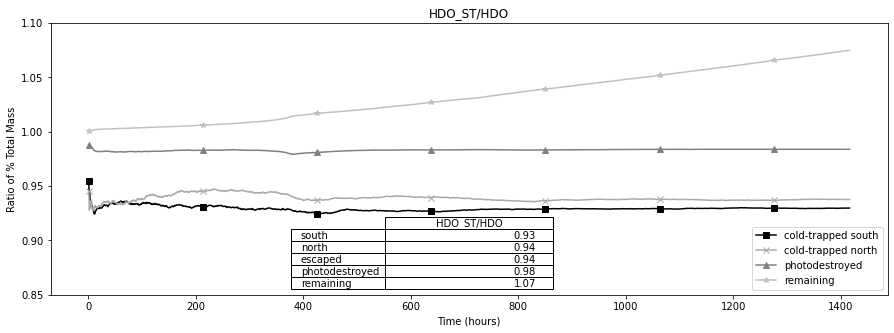

In [10]:

plt.plot(h2o_percent['time'], h2o_percent['south']/hdo_percent['south'], label = 'cold-trapped south',
        marker = 's', markevery=300, color="black")
plt.plot(h2o_percent['time'], h2o_percent['north']/hdo_percent['north'], label = 'cold-trapped north',
        marker = 'x', markevery=300, color="darkgray")
#plt.plot(h2o_percent['time'], h2o_percent['escaped']/hdo_percent['escaped'], label = 'escaped',
 #       marker = 'o', markevery=150, color="lightgray")
plt.plot(h2o_percent['time'], h2o_percent['photodestroyed']/hdo_percent['photodestroyed'], label = 'photodestroyed',
         marker = '^', markevery=300, color="gray")
plt.plot(h2o_percent['time'], h2o_percent['remaining']/hdo_percent['remaining'], label = 'remaining',
         marker = '*', markevery=300, color="silver")
plt.rcParams["figure.figsize"] = [8, 5]

col_labels=['HDO_ST/HDO','HDO'] #need the second column for formatting
row_labels=['south', 'north', 'escaped', 'photodestroyed', 'remaining']
#row_labels=['% remaining', '% photodestroyed', '% cold-trapped north', '% cold-trapped south', '% escaped']

# the rectangle is where I want to place the table
the_table = plt.table(cellText=table_vals2,
                  colWidths = [0.2]*3,
                  rowLabels=row_labels,
                  colLabels=col_labels,
                  loc='lower center')

plt.title('HDO_ST/HDO')
plt.xlabel('Time (hours)')
plt.ylim([0.85, 1.1])
plt.ylabel('Ratio of % Total Mass')
plt.legend(loc='lower right')

In [7]:
table_vals = [[round(h2o_percent['remaining'].iloc[-1], 2), round(hdo_percent['remaining'].iloc[-1], 2)], 
             [round(h2o_percent['photodestroyed'].iloc[-1], 2), round(hdo_percent['photodestroyed'].iloc[-1], 2)], 
             [round(h2o_percent['south'].iloc[-1], 2), round(hdo_percent['south'].iloc[-1], 2)], 
             [round(h2o_percent['north'].iloc[-1], 2), round(hdo_percent['north'].iloc[-1], 2)], 
             [round(h2o_percent['escaped'].iloc[-1], 2), round(hdo_percent['escaped'].iloc[-1], 2)]]
print(table_vals)

[[23.55, 21.91], [69.45, 70.6], [3.73, 4.01], [3.26, 3.48], [0.01, 0.01]]


<ipython-input-9-b1fccf10446e>:36: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([l1, l2, l3, l4, l5, l6, l7, l8, l9, l10],     # The line objects


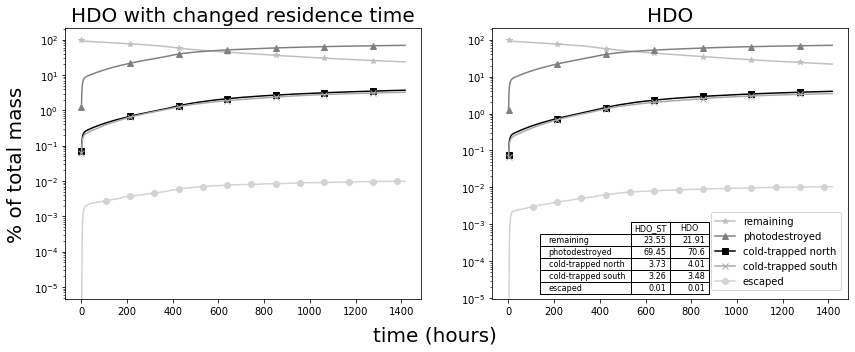

In [9]:
from matplotlib.font_manager import FontProperties
fig, (ax1, ax2) = plt.subplots(1, 2)

#H2O Data
l1 = ax1.plot(h2o_percent['time'], h2o_percent['remaining'], marker = '*', markevery=300, color="silver")[0]
l2 = ax1.plot(h2o_percent['time'], h2o_percent['photodestroyed'], marker = '^', markevery=300, color="gray")[0]
l3 = ax1.plot(h2o_percent['time'], h2o_percent['south'], marker = 's', markevery=300, color="black")[0]
l4 = ax1.plot(h2o_percent['time'], h2o_percent['north'], marker = 'x', markevery=300, color="darkgray")[0]
l5 = ax1.plot(h2o_percent['time'], h2o_percent['escaped'], marker = 'o', markevery=150, color="lightgray")[0]

#HDO Data
l6 = ax2.plot(hdo_percent['time'], hdo_percent['remaining'], marker = '*', markevery=300, color="silver")[0]
l7 = ax2.plot(hdo_percent['time'], hdo_percent['photodestroyed'], marker = '^', markevery=300, color="gray")[0]
l8 = ax2.plot(hdo_percent['time'], hdo_percent['south'], marker = 's', markevery=300, color="black")[0]
l9 = ax2.plot(hdo_percent['time'], hdo_percent['north'], marker = 'x', markevery=300, color="darkgray")[0]
l10 = ax2.plot(hdo_percent['time'], hdo_percent['escaped'], marker = 'o', markevery=150, color="lightgray")[0]



#Make Subplots
ax1.plot()
ax2.plot()

#Plotted Graph
ax.xaxis.set_label_coords(0.5, -0.1) 
#plt.xlabel("time (hours)", fontsize=20, )
plt.rcParams["figure.figsize"] = [15, 5]
fig.text(0.41, 0.01, 'time (hours)', fontsize=20)
fig.text(0.08, 0.5, '% of total mass', fontsize=20, ha='center', va='center', rotation='vertical')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_title('HDO with changed residence time', fontsize=20)
ax2.set_title('HDO', fontsize=20)
line_labels = ['remaining', 'photodestroyed', 'cold-trapped north', 'cold-trapped south', 'escaped']

fig.legend([l1, l2, l3, l4, l5, l6, l7, l8, l9, l10],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           bbox_to_anchor=(0.78, 0.28))
plt.subplots_adjust(right=0.85)

col_labels=['HDO_ST','HDO']
row_labels=['remaining', 'photodestroyed', 'cold-trapped north', 'cold-trapped south', 'escaped']
#row_labels=['% remaining', '% photodestroyed', '% cold-trapped north', '% cold-trapped south', '% escaped']

# the rectangle is where I want to place the table
the_table = plt.table(cellText=table_vals,
                  colWidths = [0.11]*3,
                  rowLabels=row_labels,
                  colLabels=col_labels,
                  loc='lower center')
plt.show()
